In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import imageio
from math import radians, sin, cos, sqrt, atan2

# Coordenadas de las ciudades
cities = {
    "Aguascalientes": (21.8853, -102.2916),
    "Mexicali": (32.6245, -115.4523),
    "La Paz": (24.1426, -110.3128),
    "San Francisco de Campeche": (19.8450, -90.5230),
    "Tuxtla Gutiérrez": (16.7528, -93.1156),
    "Chihuahua": (28.6353, -106.0889),
    "Ciudad de México": (19.4326, -99.1332),
    "Saltillo": (25.4232, -101.0053),
    "Colima": (19.2433, -103.7250),
    "Victoria de Durango": (24.0277, -104.6532),
    "Toluca": (19.2826, -99.6557),
    "Guanajuato": (21.0190, -101.2574),
    "Chilpancingo": (17.5514, -99.5006),
    "Pachuca": (20.1011, -98.7591),
    "Guadalajara": (20.6597, -103.3496),
    "Morelia": (19.7008, -101.1844),
    "Cuernavaca": (18.9261, -99.2308),
    "Tepic": (21.5067, -104.8940),
    "Monterrey": (25.6866, -100.3161),
    "Oaxaca de Juárez": (17.0732, -96.7266),
    "Puebla": (19.0414, -98.2063),
    "Santiago de Querétaro": (20.5888, -100.3899),
    "Chetumal": (18.5001, -88.2961),
    "San Luis Potosí": (22.1565, -100.9855),
    "Culiacán": (24.8091, -107.3940),
    "Hermosillo": (29.0729, -110.9559),
    "Villahermosa": (17.9895, -92.9475),
    "Ciudad Victoria": (23.7369, -99.1411),
    "Tlaxcala de Xicohténcatl": (19.3139, -98.2400),
    "Xalapa": (19.5423, -96.9100),
    "Mérida": (20.9674, -89.5926),
    "Zacatecas": (22.7709, -102.5833),
}

# Parámetros del costo
seller_hour_cost = 200  # MXN por hora
fuel_price_per_liter = 24.0  # MXN por litro
car_efficiency_km_per_l = 15  # km por litro
speed_kmh = 80  # Velocidad promedio del vendedor

# Función para calcular la distancia (Haversine)
def calculate_distance(coord1, coord2):
    R = 6371  # Radio de la Tierra en km
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Distancia en km

# Matriz de distancias
city_names = list(cities.keys())
num_cities = len(city_names)
distance_matrix = np.zeros((num_cities, num_cities))

for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            distance_matrix[i, j] = calculate_distance(cities[city_names[i]], cities[city_names[j]])

print(distance_matrix)
# Costo de la ruta
def route_cost(route):
    total_distance = sum(distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))
    travel_time = total_distance / speed_kmh
    fuel_cost = total_distance / car_efficiency_km_per_l * fuel_price_per_liter
    return seller_hour_cost * travel_time + fuel_cost


[[   0.         1762.92905502  858.26707143 ...  617.31393672
  1318.05030746  102.94350619]
 [1762.92905502    0.         1068.36726095 ... 2348.14369777
  2864.37717329 1672.44288244]
 [ 858.26707143 1068.36726095    0.         ... 1473.95252425
  2154.73699435  802.94980653]
 ...
 [ 617.31393672 2348.14369777 1473.95252425 ...    0.
   779.52913828  689.0839793 ]
 [1318.05030746 2864.37717329 2154.73699435 ...  779.52913828
     0.         1354.98922118]
 [ 102.94350619 1672.44288244  802.94980653 ...  689.0839793
  1354.98922118    0.        ]]


In [8]:
# Algoritmo ACO
def ant_colony_optimization(num_ants, num_iterations, alpha, beta, evaporation_rate):
    pheromones = np.ones((num_cities, num_cities)) * 0.1
    best_route = None
    best_cost = float('inf')

    for iteration in range(num_iterations):
        all_routes = []
        all_costs = []

        for _ in range(num_ants):
            route = [random.randint(0, num_cities - 1)]
            for _ in range(num_cities - 1):
                current_city = route[-1]
                probabilities = [
                    (pheromones[current_city, next_city] ** alpha) *
                    ((1 / distance_matrix[current_city, next_city]) ** beta)
                    if next_city not in route else 0
                    for next_city in range(num_cities)
                ]
                probabilities = np.array(probabilities)
                probabilities /= probabilities.sum()
                next_city = np.random.choice(range(num_cities), p=probabilities)
                route.append(next_city)

            cost = route_cost(route + [route[0]])  # Ciclo completo
            all_routes.append(route)
            all_costs.append(cost)

            if cost < best_cost:
                best_cost = cost
                best_route = route

        pheromones *= (1 - evaporation_rate)
        for route, cost in zip(all_routes, all_costs):
            for i in range(len(route) - 1):
                pheromones[route[i], route[i + 1]] += 1 / cost

    return best_route, best_cost

# Ejecutar ACO
best_route, best_cost = ant_colony_optimization(num_ants=50, num_iterations=300, alpha=1, beta=2, evaporation_rate=0.5)
print(f"Mejor ruta ACO: {best_route}")
print(f"Costo: {best_cost}")


Mejor ruta ACO: [19, 12, 16, 6, 10, 15, 21, 11, 23, 0, 31, 14, 8, 17, 9, 24, 2, 25, 1, 5, 7, 18, 27, 13, 28, 20, 29, 26, 3, 30, 22, 4]
Costo: 36245.15991615185


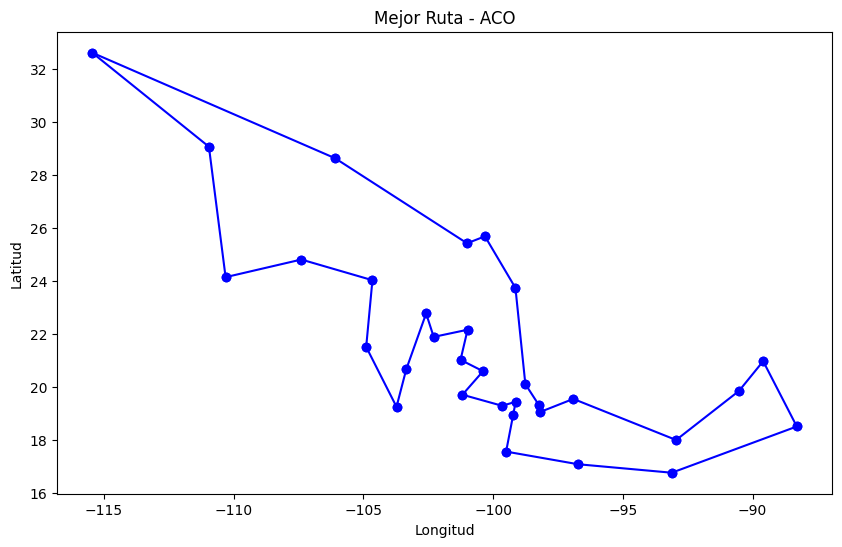

In [9]:
# Visualizar la ruta
def plot_route(route, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        plt.plot(
            [cities[city_names[city1]][1], cities[city_names[city2]][1]],
            [cities[city_names[city1]][0], cities[city_names[city2]][0]],
            'b-o'
        )
    plt.title(title)
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.show()

plot_route(best_route + [best_route[0]], "Mejor Ruta - ACO")
